提供了6万张28*28像素点的0-9手写数字图片和标签，用于训练。

提供1万张28*28像素点的0-9手写数字图片和标签，用于测试。

11493376/11490434 [==============================] - 104s 9us/step


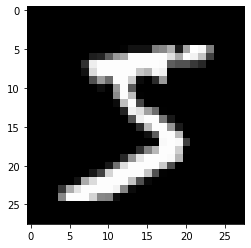

x_train[0]:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 2

In [1]:
import tensorflow as tf
from matplotlib import pyplot as plt

# 导入MNIST数据集
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 可视化训练集输入特征的第一个元素
plt.imshow(x_train[0], cmap='gray')  # 绘制灰度图
plt.show()

# 打印出训练集输入特征的第一个元素
print("x_train[0]:\n", x_train[0])
# 打印出训练集标签的第一个元素
print("y_train[0]:\n", y_train[0])

# 打印出整个训练集输入特征形状
print("x_train.shape:\n", x_train.shape)
# 打印出整个训练集标签的形状
print("y_train.shape:\n", y_train.shape)
# 打印出整个测试集输入特征的形状
print("x_test.shape:\n", x_test.shape)
# 打印出整个测试集标签的形状
print("y_test.shape:\n", y_test.shape)


#### 使用Sequent网络结构

In [2]:
import tensorflow as tf

# 导入数据
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#对输入特征数值进行归一化，使0-255变成0-1，更适合神经网络吸收
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
    # 把输入特征拉直为一维数组
    tf.keras.layers.Flatten(),
    # 定义第一层神经网络：128个神经元，用relu激活函数
    tf.keras.layers.Dense(128, activation='relu'),
    # 定义第二层神经网络：10个神经元，用softmax激活函数，使输出更符合概率分布
    tf.keras.layers.Dense(10, activation='softmax')
])

# 使用comiple配置训练方法优化器选择Adam
model.compile(optimizer='adam',
              # 损失函数使用SparseCategoricalCrossentropy交叉熵损失函数，由于使用了softmax所以输出满足概率分布不是原始数值
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              # 数据集中的标签是数值，神经网络输出y是概率分布，选用sparse_categorical_accuracy
              metrics=['sparse_categorical_accuracy'])

# 在fit中执行训练过程，每次喂入32组数据，数据集迭代5次，每迭代一次训练集执行一次测试集的评测
model.fit(x_train, y_train, batch_size=32, epochs=5, validation_data=(x_test, y_test), validation_freq=1)
#打印网络结构和参数统计
model.summary()


Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 6s 93us/sample - loss: 0.2628 - sparse_categorical_accuracy: 0.9244 - val_loss: 0.1424 - val_sparse_categorical_accuracy: 0.9558
Epoch 2/5
60000/60000 [==============================] - 5s 87us/sample - loss: 0.1146 - sparse_categorical_accuracy: 0.9665 - val_loss: 0.1071 - val_sparse_categorical_accuracy: 0.9674
Epoch 3/5
60000/60000 [==============================] - 5s 86us/sample - loss: 0.0790 - sparse_categorical_accuracy: 0.9765 - val_loss: 0.0896 - val_sparse_categorical_accuracy: 0.9724
Epoch 4/5
60000/60000 [==============================] - 5s 84us/sample - loss: 0.0596 - sparse_categorical_accuracy: 0.9817 - val_loss: 0.0779 - val_sparse_categorical_accuracy: 0.9765
Epoch 5/5
60000/60000 [==============================] - 5s 85us/sample - loss: 0.0462 - sparse_categorical_accuracy: 0.9862 - val_loss: 0.0812 - val_sparse_categorical_accuracy: 0.9761
Model: "sequential"


#### 使用类class网络结构

In [3]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras import Model

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0


class MnistModel(Model):
    def __init__(self):
        super(MnistModel, self).__init__()
        #拉直
        self.flatten = Flatten()
        #设置层数、神经元、激活函数
        self.d1 = Dense(128, activation='relu')
        self.d2 = Dense(10, activation='softmax')

    def call(self, x):
        #前向传播
        x = self.flatten(x)
        x = self.d1(x)
        y = self.d2(x)
        return y

# 实例化model
model = MnistModel()

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['sparse_categorical_accuracy'])

model.fit(x_train, y_train, batch_size=32, epochs=5, validation_data=(x_test, y_test), validation_freq=1)
model.summary()


Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 6s 104us/sample - loss: 0.2571 - sparse_categorical_accuracy: 0.9257 - val_loss: 0.1351 - val_sparse_categorical_accuracy: 0.9598
Epoch 2/5
60000/60000 [==============================] - 5s 86us/sample - loss: 0.1157 - sparse_categorical_accuracy: 0.9659 - val_loss: 0.1027 - val_sparse_categorical_accuracy: 0.9681
Epoch 3/5
60000/60000 [==============================] - 5s 85us/sample - loss: 0.0793 - sparse_categorical_accuracy: 0.9762 - val_loss: 0.0941 - val_sparse_categorical_accuracy: 0.9694
Epoch 4/5
60000/60000 [==============================] - 5s 86us/sample - loss: 0.0580 - sparse_categorical_accuracy: 0.9823 - val_loss: 0.0831 - val_sparse_categorical_accuracy: 0.9754
Epoch 5/5
60000/60000 [==============================] - 5s 90us/sample - loss: 0.0451 - sparse_categorical_accuracy: 0.9862 - val_loss: 0.0763 - val_sparse_categorical_accuracy: 0.9755
Model: "mnist_model